# **_Convert a Distribution using Min-Max Scaling, Invert Back and Compare_**

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

This Python Jupyter Notebook is my answer to a coding challenge from the **Data Normalization and Outliers** section of Mike X. Cohen's Statistics & Machine Learning course on Udemy.

-   Udemy course: https://www.udemy.com/course/statsml_x

-   Professor Cohen's website: https://www.mikexcohen.com/

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

## **_Goals:_**

1.  Take the formula which scales a dataset `x` to an arbritarily-ranged min-max version, then invert that equation to recalculate `x`. See if the original `x` values match the inverted, recalculated `x` values.

2.  Use Python to visualize/compare the three datasets (original, scaled, inverse of scaled), and verify that the original dataset minus the inverted dataset are equal, _i.e._, the difference dataset is all zeros within a $10^{-12}$ degree of machine error.

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

## **_1. Invert the Formula:_**

#### **_A) Calculate the Inverse of the formula for Arbitrarily-Ranged Min-Max Scaling, which will leave us with our original dataset:_**

$$
\Large
    x^* \; = \; a + \left( \frac{x - min(x)}{max(x) - min(x)} \right) \left( b - a \right)
$$    

-   _Note:_ This formula scales to an arbitrary range determined by `a` and `b`. Part of this formula is the simpler method which first scales our original dataset `x` to a range of `0` (min) through `1` (max):

$$
\Large
    \tilde{x} \; = \; \frac{x - min(x)}{max(x) - min(x)}
$$    

<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 85%;">

#### **_B) Do the Algebra to get the Arbitrary Min-Max Scaling formula to show us the original dataset `x`:_**

-   $\textcolor{cyan}{x^*}$ indicates the dataset scaled to an arbitrary range.

-   We solve for the $\textcolor{gold}{x}$ in the numerator of the right-side term which subtracts $min(x)$.

$$
    \begin{gathered}
        \textcolor{cyan}{x^*} \; = \; a + \left( \frac{\textcolor{gold}{x} - min(x)}{max(x) - min(x)} \right) \left( b - a \right)

        \\ \\ \Downarrow \\ \\

        \textcolor{cyan}{x^*} - a \; = \; \left( \frac{\textcolor{gold}{x} - min(x)}{max(x) - min(x)} \right) \left( b - a \right)

        \\ \\ \Downarrow \\ \\

        \frac{\textcolor{cyan}{x^*} - a}{b - a} \; = \; \frac{\textcolor{gold}{x} - min(x)}{max(x) - min(x)}

        \\ \\ \Downarrow \\ \\

        \frac{\left(\textcolor{cyan}{x^*} - a \right) \left(max(x) - min(x) \right)}{\left(b - a \right)} \; = \; \textcolor{gold}{x} - min(x)

        \\ \\ \Downarrow \\ \\

        \frac{\left(\textcolor{cyan}{x^*} - a \right) \left(max(x) - min(x) \right)}{\left(b - a \right)} + min(x) \; = \; \textcolor{gold}{x}

        \\ \\ \Downarrow \\ \\

        \textcolor{gold}{x} \; = \; \frac{\left(\textcolor{cyan}{x^*} - a \right) \left(max(x) - min(x) \right)}{\left(b - a \right)} \; + \; min(x)
    \end{gathered}
$$

<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 85%;">

#### **_C) We now have the inverted equation we'll use in the inversion part of our code to check if we got back to the original dataset:_**

$$
\LARGE
    \textcolor{gold}{x} \; = \; \frac{\left(\textcolor{cyan}{x^*} - a \right) \left(max(x) - min(x) \right)}{\left(b - a \right)} \; + \; min(x)
$$    

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

## **_Code:_**

In [1]:
# # # # # # # # # # # #
# 1. Import libraries #
# # # # # # # # # # # #

from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# # # # # # # # # # # # # # # # #
# 2. Create Prime Num Functions #
# # # # # # # # # # # # # # # # #

def prime_check(num):
    """Checks if arg is a prime number."""
    if num <= 1:
        return False
    for i in range(2, int(np.sqrt(num)) + 1):
        if num % i == 0:
            return False
    return True


def prime_array(ceil):
    """Creates NumPy array of prime numbers up
    to specified ceiling."""
    arr = []
    for i in range(2, ceil + 1):
        if prime_check(i):
            arr.append(i)
    return np.array(arr)

In [3]:
# # # # # # # # # # # # # #
# 3. Do the Required Math #
# # # # # # # # # # # # # #

# Get desired max prime number value:
CEIL = 12025

# Create prime number array:
x1_orig = np.log(prime_array(CEIL))
# Note the minimum and maximum values:
x1_min_expected, x1_max_expected = np.round((np.log(2), np.log(CEIL)), 2)
x1_min_measured, x1_max_measured = np.round((min(x1_orig), max(x1_orig)), 2)

# Define arbitrary range for min-max scaling:
a_low = np.random.randint(1, 51)
b_high = np.random.randint(51, 101)


def minmax_scaler(dist, a, b):
    """Takes a distribution and returns a
    min-max scaled version with desired
    arbitrary values `a` and `b`."""
    xmin = dist - min(dist)
    maxmin = max(dist) - min(dist)
    xdiv = xmin / maxmin
    return a + xdiv * (b - a)


# Create the scaled version:
x2_minmax = minmax_scaler(x1_orig, a_low, b_high)
# Note the minimum and maximum values:
x2_min_measured, x2_max_measured = np.round((min(x2_minmax), max(x2_minmax)), 2)


def invert_minmax_scale(dist1, distScale, a, b):
    """Inverts the scaled array back (hopefully)
    to its original form."""
    num = (distScale - a) * (max(dist1) - min(dist1))
    denom = b - a
    return num / denom + min(dist1)


# Invert the scaled array back to its original values:
x3_inv = invert_minmax_scale(x1_orig, x2_minmax, min(x2_minmax), max(x2_minmax))
# Note the minimum and maximum values:
x3_min_measured, x3_max_measured = np.round((min(x3_inv), max(x3_inv)), 2)

x3_inv_zeros = abs(x1_orig - x3_inv)
back_to_orig_check = bool(np.all(x3_inv_zeros < 10**-12))

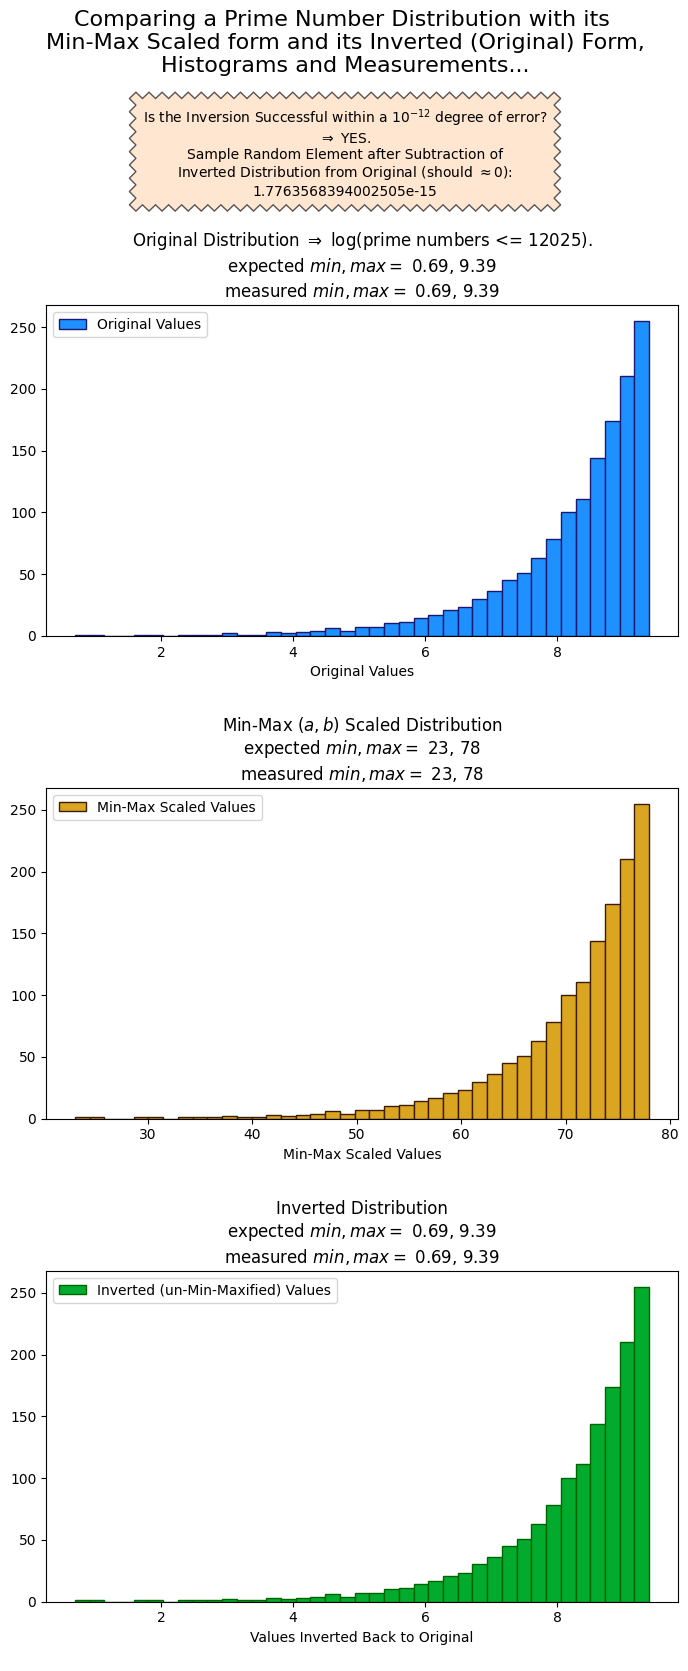

In [5]:
# # # # # # # # # # # #
# 4. Plot and Analyze #
# # # # # # # # # # # #

# Instantiate figure:
fig = plt.figure(figsize=(7, 17))

# Use GridSpec functionality to determine
#  row/col count/configuration:
gs = GridSpec(3, 1, figure=fig)

# Make accessible the subplots:
axes = [
    fig.add_subplot(gs[0]),
    fig.add_subplot(gs[1]),
    fig.add_subplot(gs[2]),
]

# Plot the original distribution:
axes[0].hist(
    x1_orig, bins='fd', color='dodgerblue', edgecolor='midnightblue', label="Original Values"
)
title_1 = "\n\nOriginal Distribution $\\Rightarrow$ log(prime numbers <= %g)." % CEIL
title_1 += "\nexpected $min, max =$ %g, %g" % (x1_min_expected, x1_max_expected)
title_1 += "\nmeasured $min, max =$ %g, %g" % (x1_min_measured, x1_max_measured)
axes[0].set_title(title_1)
axes[0].set_xlabel("Original Values")
axes[0].legend()

# Plot the scaled distribution:
axes[1].hist(
    x2_minmax,
    bins='fd',
    color='goldenrod',
    edgecolor='xkcd:chocolate',
    label="Min-Max Scaled Values",
)
title_2 = "\nMin-Max ($a, b$) Scaled Distribution"
title_2 += "\nexpected $min, max =$ %g, %g" % (a_low, b_high)
title_2 += "\nmeasured $min, max =$ %g, %g" % (x2_min_measured, x2_max_measured)
axes[1].set_title(title_2)
axes[1].set_xlabel("Min-Max Scaled Values")
axes[1].legend()

# Plot the inverted distribution, should match the original:
axes[2].hist(
    x3_inv,
    bins='fd',
    color='xkcd:kelly green',
    edgecolor='darkgreen',
    label="Inverted (un-Min-Maxified) Values",
)
title_3 = "\nInverted Distribution"
title_3 += "\nexpected $min, max =$ %g, %g" % (x1_min_expected, x1_max_expected)
title_3 += "\nmeasured $min, max =$ %g, %g" % (x3_min_measured, x3_max_measured)
axes[2].set_title(title_3)
axes[2].set_xlabel("Values Inverted Back to Original\n")
axes[2].legend()

# Create main title:
sup_title = "Comparing a Prime Number Distribution with its "
sup_title += "\nMin-Max Scaled form and its Inverted (Original) Form,"
sup_title += "\nHistograms and Measurements...\n\n\n\n\n"
plt.suptitle(sup_title, size=16)

# Add notation verifying accuracy of conversions:
description = "Is the Inversion Successful within a $10^{-12}$ "
description += "degree of error?\n$\\Rightarrow$ %s." % ["NO", "YES"][back_to_orig_check]
description += "\nSample Random Element after Subtraction of"
description += "\nInverted Distribution from Original (should $\\approx 0$):"
description += "\n%s" % np.random.choice(x3_inv_zeros)
fig.text(
    0.5,
    0.9225,
    description,
    fontsize=10,
    verticalalignment='top',
    horizontalalignment='center',
    bbox=dict(boxstyle='sawtooth,pad=0.95', facecolor='peachpuff', alpha=0.65, mutation_aspect=0.95),
)

# Plot with space:
plt.tight_layout()
plt.show()

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 85%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px #5EDC1F; width: 75%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px magenta; width: 65%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px gold; width: 55%;">

<font size=2>

_Andrew Blais, Boston, Massachusetts_

GitHub: https://github.com/andrewblais

Website/Python Web Development Porfolio: https://www.andrewblais.dev/

</font>

<font size=1>

```python
# python
```

</font>